# Save the Space Humans!

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Aquire

In [3]:
df = pd.read_csv('train.csv')

In [167]:
pd.read_csv('test.csv')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Data Dictionary

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.columns = df.columns.str.lower()

In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print()

8906_01    1
2356_01    1
5466_04    1
5039_02    1
5837_01    1
          ..
1736_01    1
3847_01    1
1168_01    1
4796_01    1
2253_01    1
Name: passengerid, Length: 8693, dtype: int64

Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64

False    5439
True     3037
Name: cryosleep, dtype: int64

G/734/S     8
G/1476/S    7
F/1411/P    7
B/82/S      7
E/13/S      7
           ..
G/524/S     1
B/100/S     1
G/1438/S    1
F/1144/P    1
F/16/S      1
Name: cabin, Length: 6560, dtype: int64

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
79.0      3
78.0      3
77.0      2
76.0      2
Name: age, Length: 80, dtype: int64

False    8291
True      199
Name: vip, dtype: int64

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1230.0       1
987.0        1
930.0        1
3097.0       1
1186.0  

- id is split by group number and number within the group
- there are three departure planets - three, eurpoa, and mars
- some people elected to cryoslept
- how do the cabin numbers correlate to the rest of the stats
- there were three destinations - trappist, canrie, pso 
- most popular ages were late teens, early twenties
- some folks were vip (did they all get cryosleep?)
- the vast majority of folks did not use room service, food court, mall, spa, or vrdeck|

In [8]:
df.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name', 'transported'],
      dtype='object')

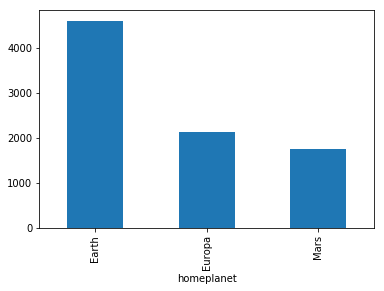

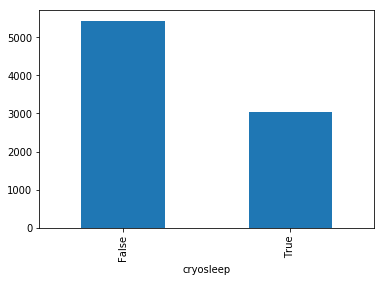

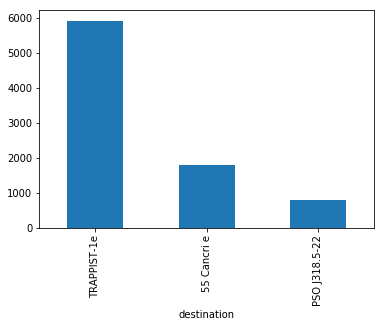

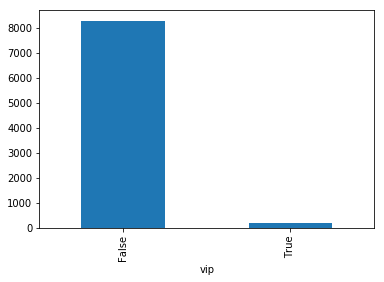

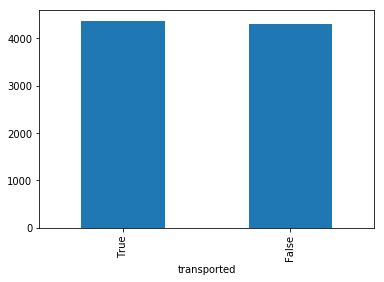

In [9]:
for col in ['homeplanet', 'cryosleep', 'destination', 'vip', 'transported']:
    df[col].value_counts().plot.bar()
    plt.xlabel(col)
    plt.show()

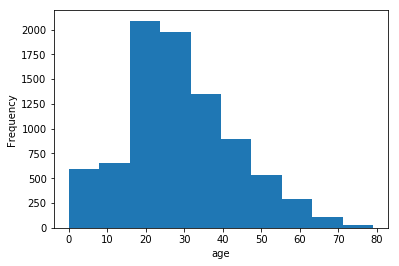

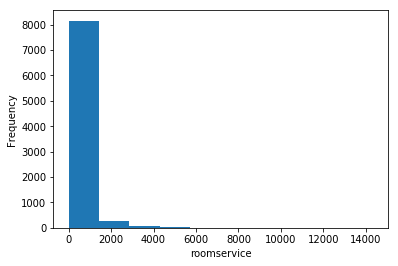

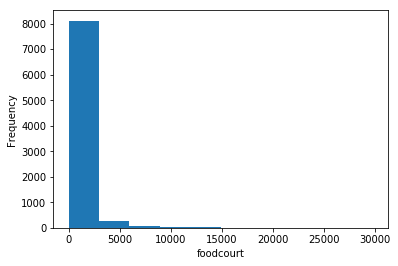

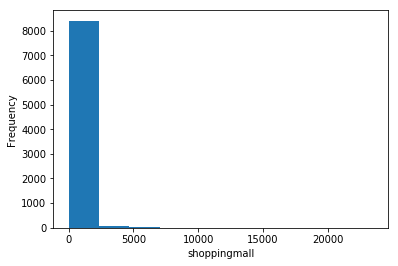

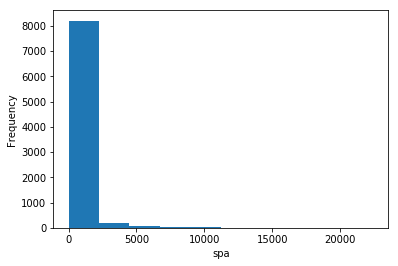

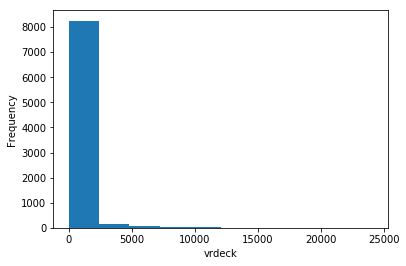

In [10]:
for col in ['age','roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']:
    df[col].plot.hist()
    plt.xlabel(col)
    plt.show()

## Prepare

In [11]:
df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
df['passenger_group'] = df.passengerid.str.split('_', expand=True)[0]

In [13]:
df.passenger_group.value_counts().value_counts()

1    4805
2     841
3     340
4     103
5      53
7      33
6      29
8      13
Name: passenger_group, dtype: int64

- Most people traveled in a group of 1

In [14]:
df['cabin_deck'] = df.cabin.str.split('/', expand=True)[0]
df['cabin_number'] = df.cabin.str.split('/', expand=True)[1]
df['cabin_side'] = df.cabin.str.split('/', expand=True)[2]

In [15]:
df.cabin_deck.value_counts(dropna=False).sort_index()

A       256
B       779
C       747
D       478
E       876
F      2794
G      2559
T         5
NaN     199
Name: cabin_deck, dtype: int64

In [16]:
df.cabin_number.astype(float).value_counts(dropna=False).sort_index()

0.0        18
1.0        15
2.0        11
3.0        16
4.0         7
         ... 
1891.0      1
1892.0      1
1893.0      1
1894.0      1
NaN       199
Name: cabin_number, Length: 1818, dtype: int64

In [17]:
df.cabin_side.value_counts(dropna=False)

S      4288
P      4206
NaN     199
Name: cabin_side, dtype: int64

- why do 199 people not have cabin numbers? :(

In [18]:
df.isnull().sum()

passengerid          0
homeplanet         201
cryosleep          217
cabin              199
destination        182
age                179
vip                203
roomservice        181
foodcourt          183
shoppingmall       208
spa                183
vrdeck             188
name               200
transported          0
passenger_group      0
cabin_deck         199
cabin_number       199
cabin_side         199
dtype: int64

In [19]:
for col in df.columns:
    print(f'for column {col}, these are teh respective number of nulls.')
    print(df [df[col].isnull()].isnull().sum())
    print()

for column passengerid, these are teh respective number of nulls.
passengerid        0
homeplanet         0
cryosleep          0
cabin              0
destination        0
age                0
vip                0
roomservice        0
foodcourt          0
shoppingmall       0
spa                0
vrdeck             0
name               0
transported        0
passenger_group    0
cabin_deck         0
cabin_number       0
cabin_side         0
dtype: int64

for column homeplanet, these are teh respective number of nulls.
passengerid          0
homeplanet         201
cryosleep            2
cabin                6
destination          4
age                  2
vip                  3
roomservice          6
foodcourt            2
shoppingmall         7
spa                  3
vrdeck               1
name                 7
transported          0
passenger_group      0
cabin_deck           6
cabin_number         6
cabin_side           6
dtype: int64

for column cryosleep, these are teh respective nu

- there is no obvious null correlation across the board

## Explore

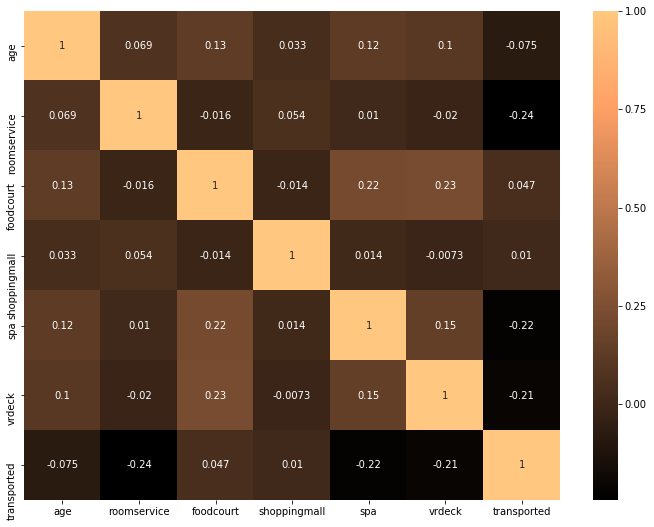

In [20]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="copper")
plt.show()

- No obvious correlations with folks who were transported

### Let's scope out folks who opted to cryosleep

In [155]:
df.cryosleep.value_counts()

False    5439
True     3037
Name: cryosleep, dtype: int64

In [156]:
pd.crosstab(df.cryosleep, df.transported)

transported,False,True
cryosleep,,
False,3650,1789
True,554,2483


In [157]:
pd.crosstab(df.cryosleep, df.transported, normalize='index')*100

transported,False,True
cryosleep,,
False,67.107924,32.892076
True,18.241686,81.758314


In [158]:
round(len(df [(df.cryosleep == True) & (df.transported == True)]) / len(df [(df.cryosleep == True) ])*100,1)

81.8

- 82% of people who elected to cryosleep were successfull transported
- this seems meaningful, was it related to where their cabin was?

### Only looking at people who opted to cryosleep

In [159]:
subset = df [df.cryosleep == True]

#### Scope out cabin deck

In [160]:
pd.crosstab(subset.cabin_deck, subset.transported)

transported,False,True
cabin_deck,,
A,4,64
B,3,416
C,2,292
D,1,103
E,59,109
F,8,542
G,460,890


In [161]:
round(pd.crosstab(subset.cabin_deck, subset.transported, normalize='index')*100,1)

transported,False,True
cabin_deck,,
A,5.9,94.1
B,0.7,99.3
C,0.7,99.3
D,1.0,99.0
E,35.1,64.9
F,1.5,98.5
G,34.1,65.9


- What happened in deck E and G? 

#### Scoping out cabin side

In [162]:
pd.crosstab(subset.cabin_side, subset.transported)

transported,False,True
cabin_side,,
P,314,1106
S,223,1310


In [163]:
round(pd.crosstab(subset.cabin_side, subset.transported, normalize='index')*100,1)

transported,False,True
cabin_side,,
P,22.1,77.9
S,14.5,85.5


- The starboard side fared a bit better than the port side 

#### Scoping out both cabin deck and side

In [164]:
table = pd.pivot_table(df, values='passengerid', index='transported', 
               columns=['cabin_deck', 'cabin_side'], aggfunc='count')
table

cabin_deck      A            B             C             D             E  \
cabin_side      P     S      P      S      P      S      P      S      P   
transported                                                                
False        66.0  63.0  115.0   92.0  143.0   96.0  148.0  123.0  282.0   
True         51.0  76.0  238.0  334.0  198.0  310.0  100.0  107.0  147.0   

cabin_deck              F             G           T       
cabin_side       S      P      S      P      S    P    S  
transported                                               
False        281.0  847.0  718.0  704.0  534.0  3.0  1.0  
True         166.0  591.0  638.0  572.0  749.0  1.0  NaN

In [165]:
pd.crosstab([subset.cabin_deck, subset.cabin_side], subset.transported)

transported            False  True 
cabin_deck cabin_side              
A          P               1     28
           S               3     36
B          P               3    181
           S               0    235
C          P               2    128
           S               0    164
D          P               1     45
           S               0     58
E          P              29     46
           S              30     63
F          P               3    276
           S               5    266
G          P             275    402
           S             185    488

In [166]:
round(pd.crosstab([subset.cabin_deck, subset.cabin_side], subset.transported, normalize='index')*100,1)

transported            False  True 
cabin_deck cabin_side              
A          P             3.4   96.6
           S             7.7   92.3
B          P             1.6   98.4
           S             0.0  100.0
C          P             1.5   98.5
           S             0.0  100.0
D          P             2.2   97.8
           S             0.0  100.0
E          P            38.7   61.3
           S            32.3   67.7
F          P             1.1   98.9
           S             1.8   98.2
G          P            40.6   59.4
           S            27.5   72.5

- Something is definitely going on in deck E and G, the port side is a little more vunerable than the star side
- I wish I had a picture of this ship! 

#### Looking at all deck cabins and transported status

In [108]:
df.cabin_deck.value_counts().sort_index()

A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: cabin_deck, dtype: int64

In [104]:
pd.crosstab(df.cabin_deck, df.transported)

transported,False,True
cabin_deck,,
A,129,127
B,207,572
C,239,508
D,271,207
E,563,313
F,1565,1229
G,1238,1321
T,4,1


In [92]:
pd.crosstab(df.cabin_deck, df.transported, normalize='index')*100

transported,False,True
cabin_deck,,
A,50.390625,49.609375
B,26.572529,73.427471
C,31.994645,68.005355
D,56.694561,43.305439
E,64.269406,35.730594
F,56.012885,43.987115
G,48.378273,51.621727
T,80.000000,20.000000


- much less consistency seen here